#Handwritten Digit Recognition

We are going to uses MNIST dataset. This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

###Installing libraries

In [ ]:
!pip install numpy tensorflow keras pillow

In [1]:
#Setting tensorflow GPU
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

###Loading the dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


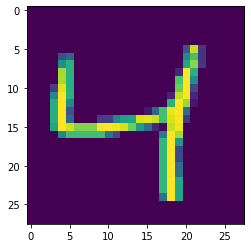

In [5]:
plt.imshow(x_train[2])

In [6]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


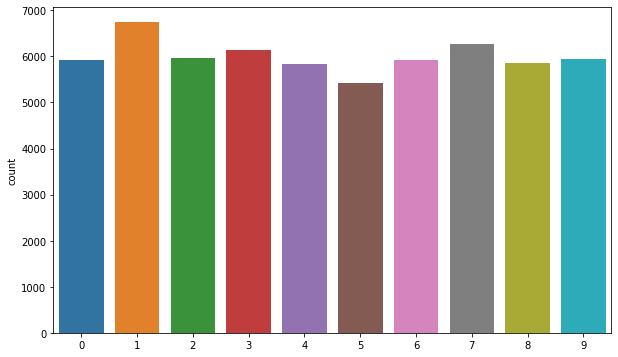

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y_train)

###Preprocessing the data

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [24]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

###Creating the Model

In [129]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [130]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2359552   
                                                      

In [131]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###Training the model

In [132]:
hist = model.fit(x_train, y_train, 
                 batch_size = 250, 
                 epochs = 25,
                 verbose = 1,
                 validation_data = (x_test, y_test))

Epoch 1/25
240/240 [==============================] - 8s 29ms/step - loss: 0.9666 - accuracy: 0.8808 - val_loss: 0.0702 - val_accuracy: 0.9770
Epoch 2/25
240/240 [==============================] - 7s 28ms/step - loss: 0.1191 - accuracy: 0.9642 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 3/25
240/240 [==============================] - 6s 27ms/step - loss: 0.0830 - accuracy: 0.9748 - val_loss: 0.0403 - val_accuracy: 0.9869
Epoch 4/25
240/240 [==============================] - 6s 27ms/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.0387 - val_accuracy: 0.9873
Epoch 5/25
240/240 [==============================] - 7s 28ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 6/25
240/240 [==============================] - 6s 27ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 7/25
240/240 [==============================] - 7s 28ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0371 - val_accuracy: 0.9883

In [133]:
#model.save('mnist.h5')
#print("Saving the model as mnist.h5")

###Evaluating the model

In [134]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.049246516078710556
Test accuracy: 0.9911999702453613


Plotting Training and Validation loss

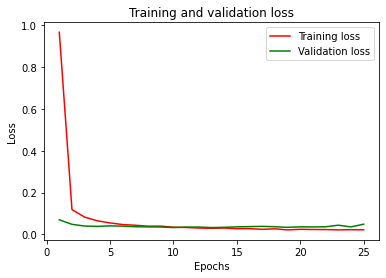

In [135]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting Training and Validation accuracy

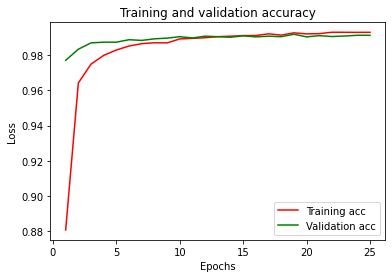

In [136]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [137]:
y_pred = model.predict_generator(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


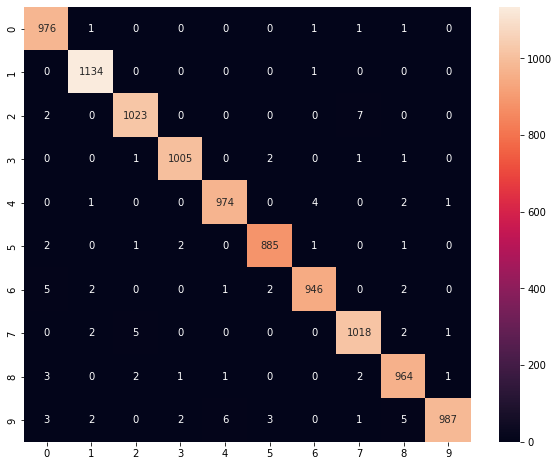

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [140]:
acc = sum(confusion_mtx.diagonal())/confusion_mtx.sum()
acc*100

99.11999999999999